<a href="https://colab.research.google.com/github/sainath-kadam/Hack_Horizons/blob/main/ml%20model/campus_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/sainath-kadam/Hack_Horizons/main/ml%20model/adm_data.csv"

In [3]:
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.drop(columns=['Serial No.'], inplace= True)

In [6]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

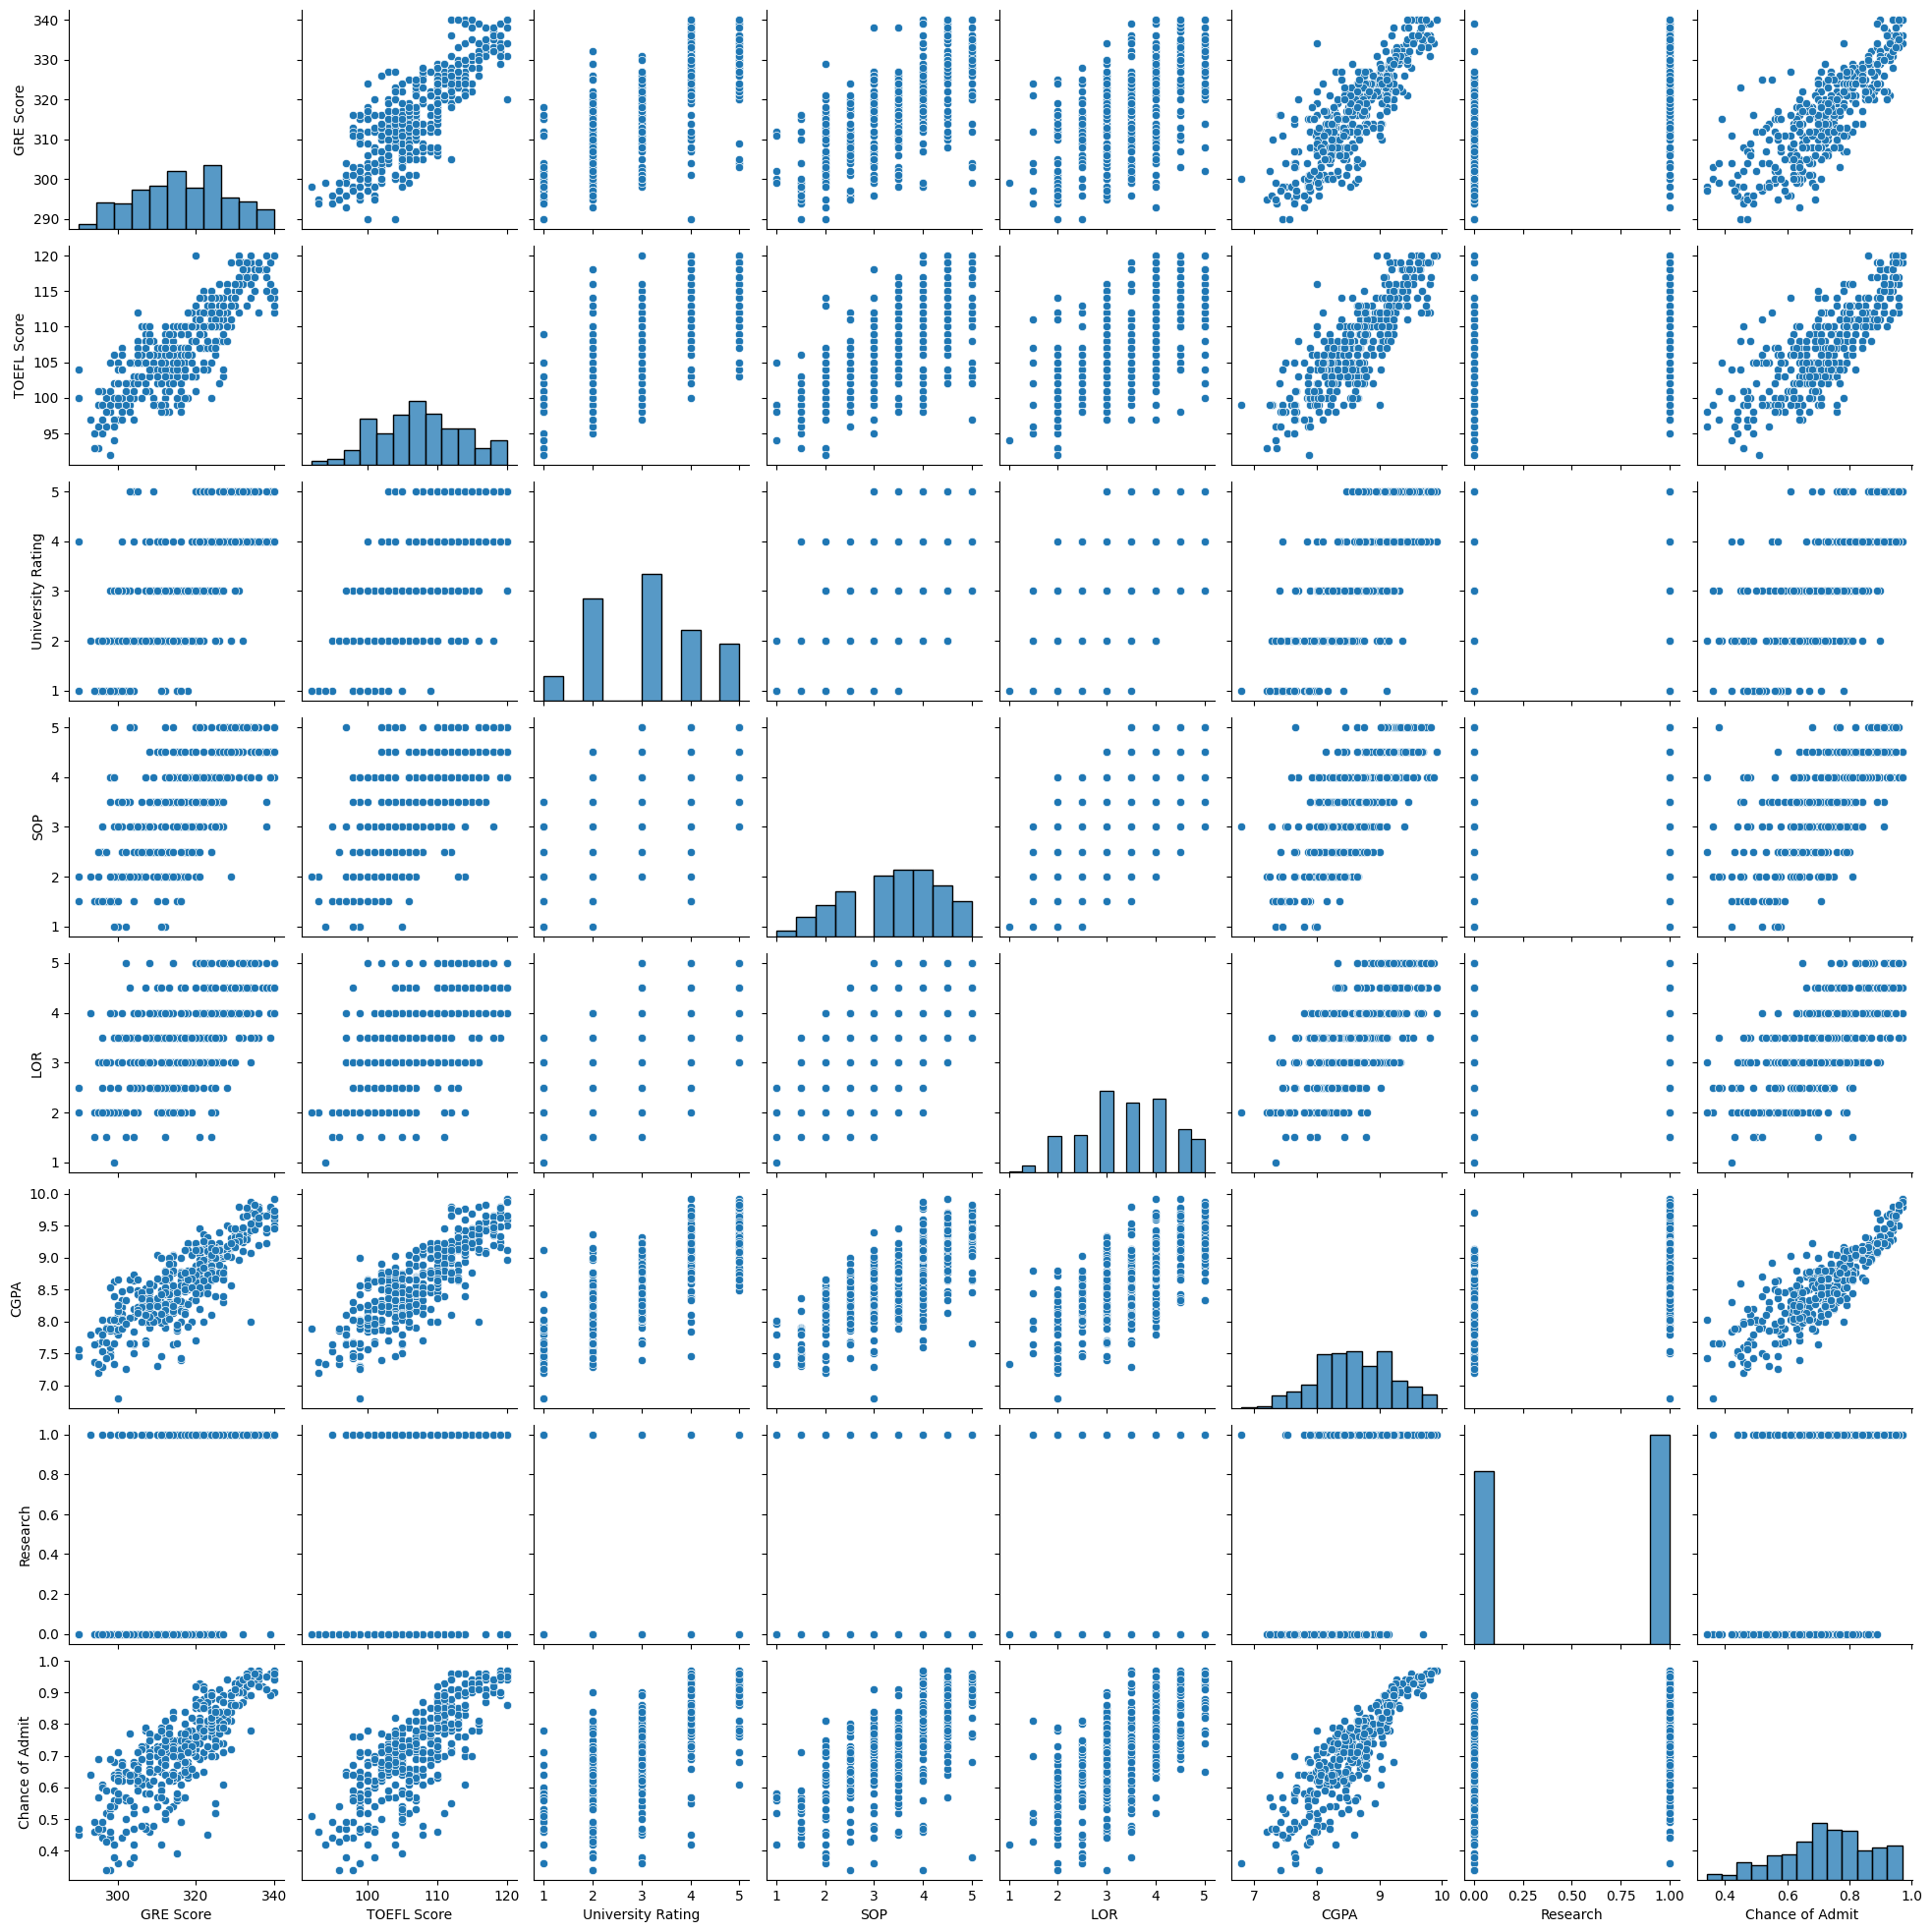

In [7]:
sns.pairplot(df)

In [8]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
X = df.drop(columns = ['Chance of Admit '])
y = df['Chance of Admit ']

In [10]:
X = np.array(X)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X[0], X_scaled[0]

(array([337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ]),
 array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154, 1.        ]))

In [12]:
x = np.array([325.000000,	112.000000,	4.000000,	4.000000,	4.000000,	9.062500,	1.000000]).reshape(1, -1) 
x = scaler.transform(x)

In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X_scaled, y, cv=cv)

array([0.73550787, 0.82210531, 0.80820697, 0.70708174, 0.87138455])

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

pra ={
    'linear':{
        'model': LinearRegression(),
        'para' : {}
    },
    'lasso' : {
        'model' : Lasso(),
        'para' : {
            'alpha' : [0.2,0.5,0.7,1,2]
        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'para' : {
            'alpha' : [0.2,0.5,0.7,1,2]
        }
    },
    'DTR' : {
        'model' : DecisionTreeRegressor(),
        'para' : {
            'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"]
  
        }
    },
}

from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [15]:
scores = []

for data in pra:
  clf = GridSearchCV(pra[data]['model'],pra[data]['para'], cv=cv)
  clf.fit(X_scaled,y)
  scores.append({
      'model': data,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
    })

import pandas as pd

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,linear,0.788857,{}
1,lasso,-0.006552,{'alpha': 0.2}
2,Ridge,0.790838,{'alpha': 0.7}
3,DTR,0.570583,{'criterion': 'squared_error'}


as we see linear regression is best model then lets go with it

In [16]:

model = LinearRegression()

model.fit(X_scaled,y)

LinearRegression()

In [17]:
model.predict(x)

array([0.83369126])

In [18]:
def predict(x):
  x = np.array(x).reshape(1,-1)
  x = scaler.transform(x)
  y = model.predict(x)
  return y[0]

In [19]:
import pickle

with open('/content/house_prediction.pickle','wb') as f:
    pickle.dump([model,predict, scaler],f)